# 6. Hydro: Projections

## Load The Data

In [8]:
using Mera
info = getinfo(300,  "../../testing/simulations/mw_L10");
gas  = gethydro(info, lmax=10); 

[Mera]: 2023-04-10T12:05:52.163

Code: RAMSES
output [300] summary:
mtime: 2023-04-09T05:34:09
ctime: 2023-04-10T08:08:14.488
simulation time: 445.89 [Myr]
boxlen: 48.0 [kpc]
ncpu: 640
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 10 --> cellsize(s): 750.0 [pc] - 46.88 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :pressure, :scalar_00, :scalar_01)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Nstars:   5.445150e+05 
particle-variables: 7  --> (:vx, :vy, :vz, :mass, :family, :tag, :birth)
particle-descriptor: (:position_x, :position_y, :position_z, :velocity_x, :velocity_y, :velocity_z, :mass, :identity, :levelp,

Progress: 100%|█████████████████████████████████████████| Time: 0:00:23


Memory used for data table :2.3210865957662463 GB
-------------------------------------------------------



In [9]:
gas.data

Table with 28320979 rows, 11 columns:
Columns:
#   colname  type
────────────────────
1   level    Int64
2   cx       Int64
3   cy       Int64
4   cz       Int64
5   rho      Float64
6   vx       Float64
7   vy       Float64
8   vz       Float64
9   p        Float64
10  var6     Float64
11  var7     Float64

## Projection of Predefined Quantities

See the possible variables:

In [10]:
projection()

Predefined vars for projections:
------------------------------------------------
=====================[gas]:=====================
       -all the non derived hydro vars-
:cpu, :level, :rho, :cx, :cy, :cz, :vx, :vy, :vz, :p, var6,...
further possibilities: :rho, :density, :ρ
              -derived hydro vars-
:x, :y, :z
:sd or :Σ or :surfacedensity
:mass, :cellsize, :freefall_time
:cs, :mach, :jeanslength, :jeansnumber
:t, :Temp, :Temperature with p/rho

==================[particles]:==================
        all the non derived  vars:
:cpu, :level, :id, :family, :tag 
:x, :y, :z, :vx, :vy, :vz, :mass, :birth, :metal....

              -derived particle vars-
:age

==============[gas or particles]:===============
:v, :ekin
squared => :vx2, :vy2, :vz2
velocity dispersion => σx, σy, σz, σ

related to a given center:
---------------------------
:vr_cylinder, vr_sphere (radial components)
:vϕ_cylinder, :vθ
squared => :vr_cylinder2, :vϕ_cylinder2
velocity dispersion => σr_cylinder, σϕ_cyli

## Projection of a Single Quantity in Different Directions (z,y,x)

Here we project the surface density in the z-direction of the data within a particular vertical range (domain=[0:1]) onto a grid corresponding to the maximum loaded level. 
Pass any object of `HydroDataType` (here: "gas") to the `projection`-function and select a variable by a Symbol (here: :sd = :surfacedensity = :Σ in Msol/pc^3)

In [11]:
proj_z = projection(gas, :sd, unit=:Msol_pc2, zrange=[0.45,0.55])
proj_z = projection(gas, :sd, :Msol_pc2, zrange=[0.45,0.55], verbose=false) # The keyword "unit" (singular) can be omit if the following order is preserved: data-object, quantity, unit.
proj_x = projection(gas, :sd, :Msol_pc2, direction = :x, zrange=[0.45,0.55], verbose=false); # Project the surface density in x-direction

[Mera]: 2023-04-10T12:06:22.093

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 1024 x 1024
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


### Select a Range Related to a Center
See also in the documentation for: load data by selection

In [12]:
cv = (gas.boxlen / 2.) * gas.scale.kpc # provide the box-center in kpc
proj_z = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[cv,cv,cv], range_unit=:kpc);

[Mera]: 2023-04-10T12:06:30.071

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Use the short notation for the box center :bc or :boxcenter for all dimensions (x,y,z):

In [13]:
proj_z = projection(gas, :sd, :Msol_pc2,  
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:boxcenter], range_unit=:kpc);

[Mera]: 2023-04-10T12:06:32.245

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



In [14]:
proj_z = projection(gas, :sd, :Msol_pc2,  
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc], range_unit=:kpc);

[Mera]: 2023-04-10T12:06:34.277

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Use the box center notation for individual dimensions, here x,z:

In [15]:
proj_z = projection(gas, :sd, :Msol_pc2,  
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc, 24., :bc], range_unit=:kpc);

[Mera]: 2023-04-10T12:06:36.462

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



### Get Multiple Quantities

Get several quantities with one function call by passing an array containing the selected variables (at least one entry). The keyword name for the units is now in plural.

In [16]:
proj1_x = projection(gas, [:sd], units=[:Msol_pc2], 
                        direction = :x, 
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2023-04-10T12:06:43.824

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 86
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Pass an array containing several quantities to process and their corresponding units:

In [17]:
proj1_z = projection(gas, [:sd, :vx], units=[:Msol_pc2, :km_s], 
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2023-04-10T12:06:48.228

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd, :vx) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 86
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


The function can be called without any keywords by preserving the following order: dataobject, variables, units

In [18]:
proj1_z = projection(gas, [:sd , :vx], [:Msol_pc2, :km_s], 
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2023-04-10T12:06:52.513

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:sd, :vx) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 86
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


If all selected variables should be of the same unit use the following arguments: dataobject, array of quantities, unit (no array needed)

In [19]:
projvel_z = projection(gas, [:vx, :vy, :vz], :km_s, 
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2023-04-10T12:06:56.640

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:vx, :vy, :vz, :sd) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



## Function Output

List the fields of the assigned object:

In [20]:
propertynames(proj1_z)

(:maps, :maps_unit, :maps_lmax, :maps_weight, :maps_mode, :lmax_projected, :lmin, :lmax, :ranges, :extent, :cextent, :ratio, :effres, :pixsize, :boxlen, :smallr, :smallc, :scale, :info)

The projected 2D maps are stored in a dictionary:

In [21]:
proj1_z.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 2 entries:
  :sd => [0.139938 0.137134 … 0.0559771 0.039597; 0.139217 0.137082 … 0.0542157…
  :vx => [77.2952 76.0304 … 81.0816 35.6391; 77.0928 75.8627 … 76.2712 35.0263;…

The maps can be accessed by giving the name of the dictionary:

In [22]:
proj1_z.maps[:sd]

428×86 Matrix{Float64}:
 0.139938   0.137134   0.131767   …  0.0872412  0.0559771  0.039597
 0.139217   0.137082   0.132994      0.0816654  0.0542157  0.0398295
 0.137721   0.136923   0.135395      0.0704139  0.0505852  0.0401868
 0.130652   0.132227   0.135241      0.060856   0.0473774  0.0403063
 0.118059   0.123044   0.132582      0.0530844  0.0446923  0.0402881
 0.10163    0.110067   0.126214   …  0.0476658  0.0429264  0.0404395
 0.0813691  0.0933035  0.116143      0.044649   0.0421367  0.0408176
 0.0669271  0.07945    0.103416      0.0428914  0.0417599  0.041163
 0.0582977  0.0685004  0.0880284     0.0423535  0.0417506  0.0414303
 0.0535281  0.06126    0.0760619     0.0423028  0.0420018  0.0418397
 0.0526318  0.0577423  0.0675286  …  0.0427375  0.0425119  0.0423895
 0.052837   0.0560511  0.0622078     0.0431381  0.0429604  0.0428636
 0.0541345  0.0561769  0.0600908     0.0435055  0.0433486  0.0432631
 ⋮                                ⋱                        ⋮
 0.345865   0.369255

The units of the maps are stored in:

In [23]:
proj1_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 2 entries:
  :sd => :Msol_pc2
  :vx => :km_s

Projections on a different grid size (see subject below):

In [24]:
proj1_z.maps_lmax

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering}()

The following fields are helpful for further calculations or plots.

In [25]:
proj1_z.ranges # normalized to the domain=[0:1]

6-element Vector{Float64}:
 0.29166666666647767
 0.7083333333328743
 0.29166666666647767
 0.7083333333328743
 0.4583333333330363
 0.5416666666663156

In [26]:
proj1_z.extent # ranges in code units

4-element Vector{Float64}:
 13.96875
 34.03125
 21.984375
 26.015625

In [27]:
proj1_z.cextent # ranges in code units relative to a given center (by default: box center)

4-element Vector{Float64}:
 -10.031250000015556
  10.031249999984444
  -2.0156250000155556
   2.0156249999844444

In [28]:
proj1_z.ratio # the ratio between the two ranges

4.976744186046512

## Plot Maps with Python

In [75]:
proj_z = projection(gas, :sd, :Msol_pc2, 
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false) 
proj_x = projection(gas, :sd, :Msol_pc2, 
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    direction = :x);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Python functions can be directly called in Julia, which gives the opportunity, e.g. to use the Matplotlib library.

In [76]:
using PyPlot
using ColorSchemes
cmap3 = ColorMap(ColorSchemes.Blues.colors)
cmap = ColorMap(ColorSchemes.lajolla.colors) # See http://www.fabiocrameri.ch/colourmaps.php
cmap2 = ColorMap(reverse(ColorSchemes.roma.colors))


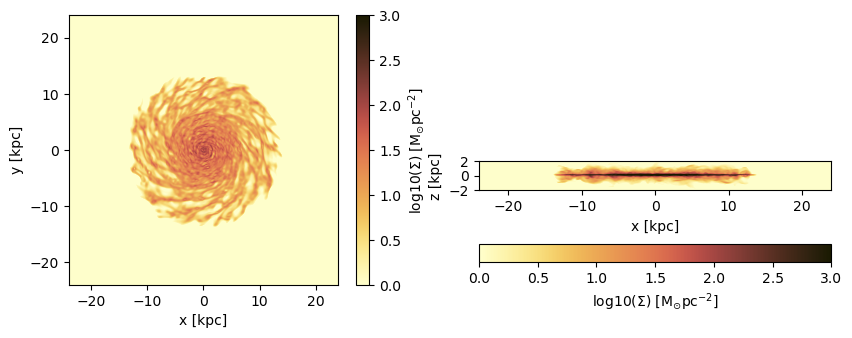

In [77]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Project a specific spatial range and plot the axes of the map relative to the box-center (given by keyword: data_center):

In [78]:
proj_z = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc) 
proj_x = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc, 
                    direction = :x);

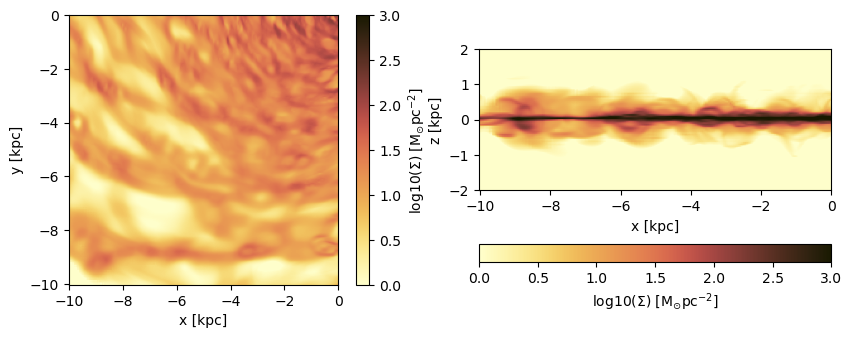

In [79]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Plot the axes of the map relative to the map-center (given by keyword: data_center):

In [80]:
proj_z = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc) 
proj_x = projection(gas, :sd, :Msol_pc2, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc, 
                    direction = :x);

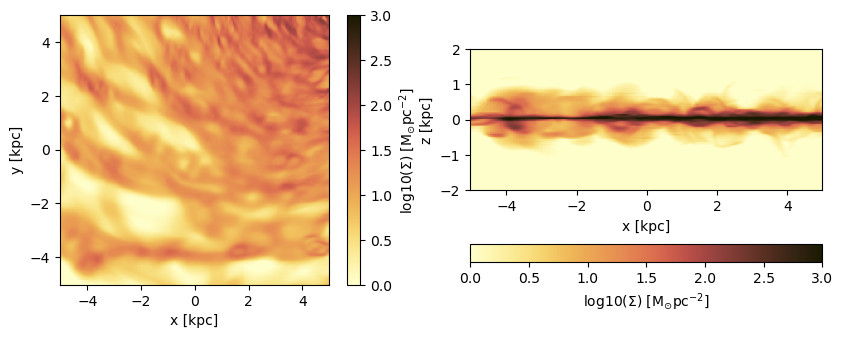

In [81]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

## Projections of Derived Kinematic Data

#### Use quantities in cartesian coordinates:

Project the following derived data
(mass weighted by default): The absolute value of the velocity :v, the velocity dispersion :σ in different directions. The Julia language supports Unicode characters and can be inserted by e.g. "\sigma + tab-key" leading to: **σ**.

In [82]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :σz], :km_s, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[24.,24.,24.], range_unit=:kpc);

[Mera]: 2023-04-10T13:07:59.030

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :σz, :vx, :vx2, :vy, :vy2, :vz, :vz2, :v2, :sd) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


For the velocity dispersion additional maps are created to created the mass-weighted quantity:
E. g.: σx = sqrt( <vx^2> - < vx >^2 )

In [83]:
proj_z.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 13 entries:
  :sd  => [6.6833e-5 6.80617e-5 … 0.000177126 0.000163977; 7.28461e-5 7.45496e-…
  :v   => [200.553 200.475 … 206.694 206.58; 201.081 201.027 … 206.638 206.51; …
  :v2  => [9.55132 9.53998 … 9.97416 9.96594; 9.58466 9.57475 … 9.96848 9.95871…
  :vx  => [2.20801 2.21133 … -2.44779 -2.44328; 2.2193 2.22319 … -2.44946 -2.44…
  :vx2 => [4.99404 5.00648 … 6.07258 6.05673; 5.03519 5.04973 … 6.07857 6.06466…
  :vy  => [-2.1024 -2.09689 … -1.95211 -1.9531; -2.10305 -2.09739 … -1.94946 -1…
  :vy2 => [4.53656 4.51184 … 3.85382 3.86121; 4.52933 4.50363 … 3.84079 3.8444;…
  :vz  => [-0.00975545 -0.0138632 … 0.145365 0.144179; -0.0151512 -0.0196064 … …
  :vz2 => [0.0207161 0.0216515 … 0.0477525 0.048001; 0.0201404 0.0213888 … 0.04…
  :σ   => [29.1564 28.8564 … 12.9517 13.3988; 27.9589 27.5801 … 12.8922 13.3103…
  :σx  => [22.5962 22.3827 … 18.6511 19.3549; 21.74 21.4671 … 18.3996 19.0645; …
  :σy  => [22.3791 22.2288 …

In [84]:
proj_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 13 entries:
  :sd  => :standard
  :v   => :km_s
  :v2  => :standard
  :vx  => :standard
  :vx2 => :standard
  :vy  => :standard
  :vy2 => :standard
  :vz  => :standard
  :vz2 => :standard
  :σ   => :km_s
  :σx  => :km_s
  :σy  => :km_s
  :σz  => :km_s

In [85]:
usedmemory(proj_z);

Memory used: 19.595 MB


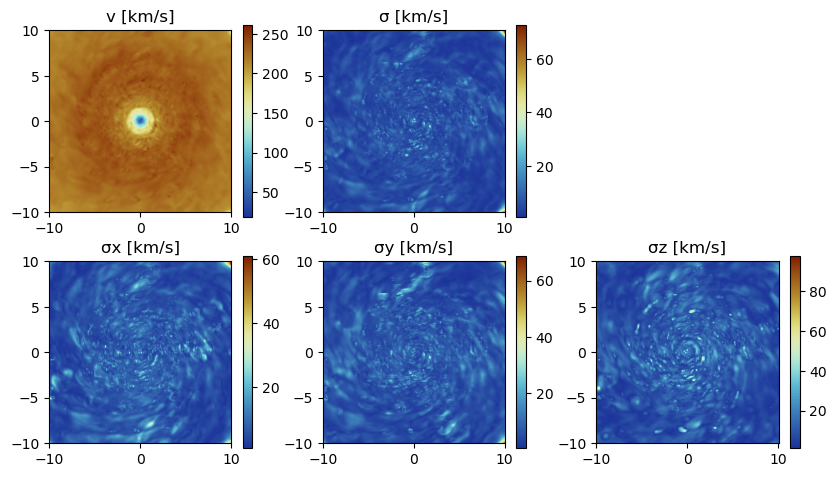

In [86]:
figure(figsize=(10, 5.5))

subplot(2, 3, 1)
title("v [km/s]")
imshow( (permutedims(proj_z.maps[:v])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 2)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(2, 3, 4)
title("σx [km/s]")
imshow( (permutedims(proj_z.maps[:σx])   ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 5)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 6)
title("σz [km/s]")
imshow( permutedims(proj_z.maps[:σz]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();


#### Use quantities in cylindrical coordinates:
#### Face-on disc (z-direction)
For the cylindrical or spherical components of a quantity, the center of the coordinate system is used (keywords: data_center = center default) and can be given with the keyword "data_center" and its units with "data_center_unit". Additionally, the quantities that are based on cartesian coordinates can be given.

In [87]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :ϕ, :r_cylinder, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder],                    
                    units=[:km_s,:km_s,:km_s, :km_s, :standard, :kpc, :km_s, :km_s, :km_s, :km_s], 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    data_center=[24.,24.,24.],
                    data_center_unit=:kpc); 

[Mera]: 2023-04-10T13:08:23.110

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :ϕ, :r_cylinder, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder, :vx, :vx2, :vy, :vy2, :v2, :vr_cylinder2, :vϕ_cylinder2, :sd) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 428 x 428
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


In [88]:
proj_z.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => [14.0758 14.0427 … 14.1201 14.1534; 14.0427 14.0096 … 14.087…
  :sd           => [6.6833e-5 6.80617e-5 … 0.000177126 0.000163977; 7.28461e-5 …
  :v            => [200.553 200.475 … 206.694 206.58; 201.081 201.027 … 206.638…
  :v2           => [9.55132 9.53998 … 9.97416 9.96594; 9.58466 9.57475 … 9.9684…
  :vr_cylinder  => [-4.89687 -5.55316 … 22.2491 21.7111; -5.09439 -5.78506 … 22…
  :vr_cylinder2 => [0.013517 0.0160811 … 0.166383 0.16509; 0.0139447 0.0166047 …
  :vx           => [2.20801 2.21133 … -2.44779 -2.44328; 2.2193 2.22319 … -2.44…
  :vx2          => [4.99404 5.00648 … 6.07258 6.05673; 5.03519 5.04973 … 6.0785…
  :vy           => [-2.1024 -2.09689 … -1.95211 -1.9531; -2.10305 -2.09739 … -1…
  :vy2          => [4.53656 4.51184 … 3.85382 3.86121; 4.52933 4.50363 … 3.8407…
  :vϕ_cylinder  => [199.868 199.758 … 204.153 204.024; 200.431 200.34 … 204.133…
  :vϕ_cylinder2 => [9.51708 

In [89]:
proj_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => :kpc
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σϕ_cylinder  => :km_s
  :ϕ            => :radian

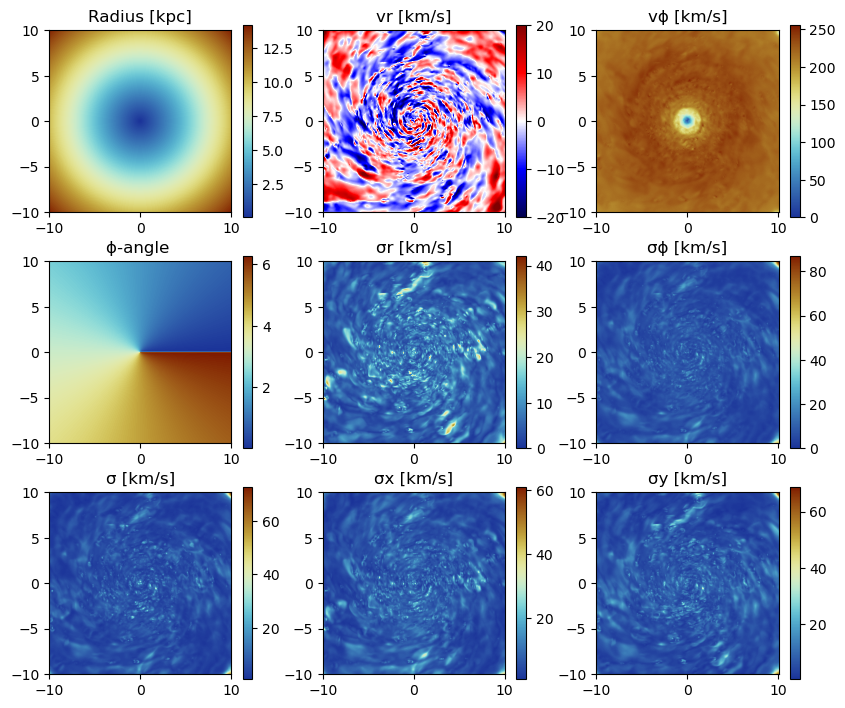

In [91]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("Radius [kpc]")
imshow( permutedims(proj_z.maps[:r_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap="seismic", origin="lower", extent=proj_z.cextent, vmin=-20.,vmax=20.)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("ϕ-angle ")
imshow( permutedims(proj_z.maps[:ϕ]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_z.maps[:σr_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_z.maps[:σϕ_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( permutedims(proj_z.maps[:σ]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_z.maps[:σx] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();

## Project on a Coarser Grid

### lmax
The default is the projection on the maximum loaded grid level (always provided in the output). Choose a smaller/larger level with the keyword `lmax` (independend on the maximum level of the simulation) to project on a coarser/finer grid. By default, the data is assumed to be in the center of the simulation box.

In [92]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    lmax=6); 

[Mera]: 2023-04-10T13:12:01.879

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder, :vx, :vx2, :vy, :vy2, :vz, :vz2, :v2, :vr_cylinder2, :vϕ_cylinder2, :sd) 
Weighting      = :mass

Effective resolution: 64^2
Map size: 28 x 28
Pixel size: 750.0 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


In [95]:
# this corresponds to an effective resolution of:
proj_z.effres

64

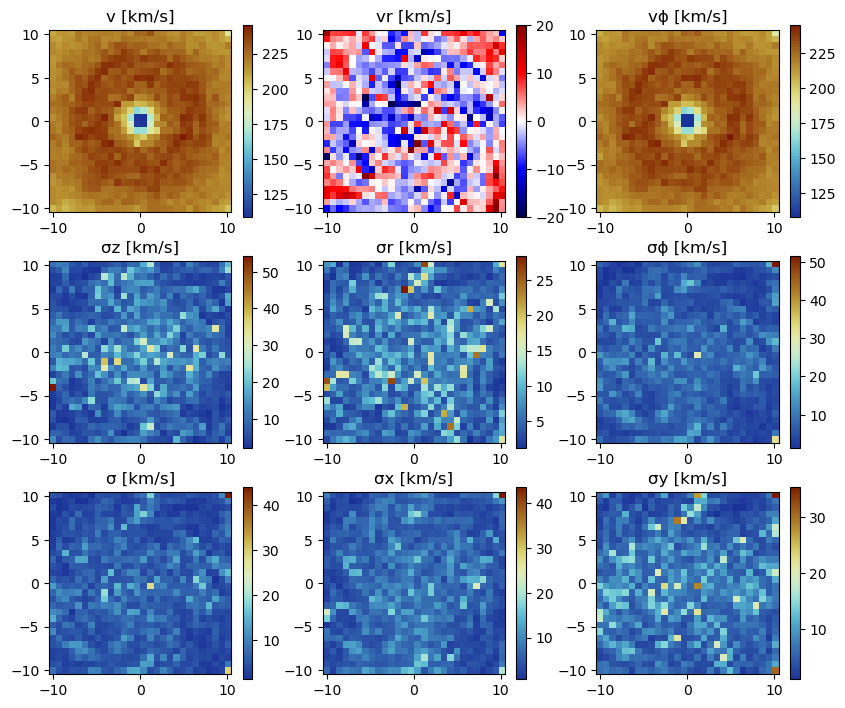

In [97]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("v [km/s]")
imshow( permutedims(proj_z.maps[:v]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap="seismic", origin="lower", extent=proj_z.cextent, vmin=-20.,vmax=20.)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("σz [km/s]")
imshow( permutedims(proj_z.maps[:σz] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_z.maps[:σr_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_z.maps[:σϕ_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( permutedims(proj_z.maps[:σ]) , cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_z.maps[:σx]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();

### res
Choose the effective resolution (related to the full box) of the projected grid:

In [98]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    res=100); 

[Mera]: 2023-04-10T13:16:07.047

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder, :vx, :vx2, :vy, :vy2, :vz, :vz2, :v2, :vr_cylinder2, :vϕ_cylinder2, :sd) 
Weighting      = :mass

Effective resolution: 100^2
Map size: 42 x 42
Pixel size: 480.0 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


### pxsize
Choose the pixel size in a physical unit, e.g. pixel-size=100 pc. The data is projected to a grid with a pixel-size that is closest to the given number, but not larger:

In [100]:
proj_z = projection(gas, [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    pxsize=[100., :pc]); 

[Mera]: 2023-04-10T13:20:23.556

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Selected var(s)=(:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder, :vx, :vx2, :vy, :vy2, :vz, :vz2, :v2, :vr_cylinder2, :vϕ_cylinder2, :sd) 
Weighting      = :mass

Effective resolution: 481^2
Map size: 201 x 201
Pixel size: 99.792 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


## Projection of Thermal Data

The the sound speed is calculated from the loaded adiabatic index (from the hydro files):

In [134]:
proj_z = projection(gas, :cs, :km_s, zrange=[0.45,0.55], xrange=[0.4, 0.6], yrange=[0.4, 0.6])
proj_x = projection(gas, :cs, :km_s, zrange=[0.45,0.55], xrange=[0.4, 0.6], yrange=[0.4, 0.6], direction=:x);

[Mera]: 2023-04-10T13:38:42.414

domain:
xmin::xmax: 0.4 :: 0.6  	==> 19.2 [kpc] :: 28.8 [kpc]
ymin::ymax: 0.4 :: 0.6  	==> 19.2 [kpc] :: 28.8 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:cs, :sd) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 206 x 206
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]

[Mera]: 2023-04-10T13:38:45.005

domain:
xmin::xmax: 0.4 :: 0.6  	==> 19.2 [kpc] :: 28.8 [kpc]
ymin::ymax: 0.4 :: 0.6  	==> 19.2 [kpc] :: 28.8 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:cs, :sd) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 206 x 104
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


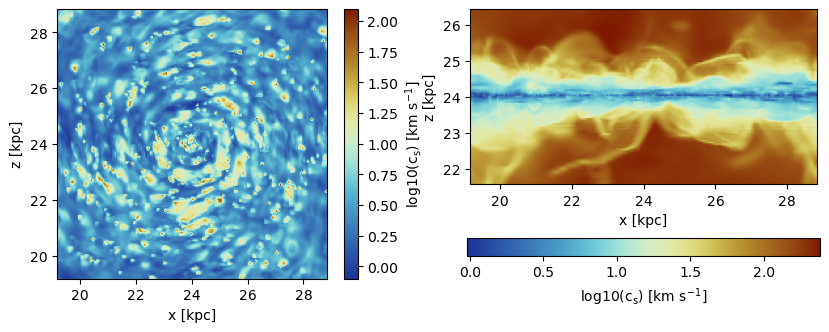

In [135]:
figure(figsize=(10, 3.5))

subplot(1, 2, 1)
im = imshow( log10.(permutedims(proj_z.maps[:cs])   ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(c_s) \ [km \ s^{-1}]}")


subplot(1, 2, 2)
im = imshow( log10.(permutedims(proj_x.maps[:cs]) ), cmap=cmap2, origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(c_s) \ [km \ s^{-1}]}",orientation="horizontal", pad=0.2);


Change the adiabatic index in the field `gas.info.gamma` to use a different value in the projection calculation.

## Projection of Masked Data

Mask higher densities by creating a Bool-array where the lower density cells correspond to false entries:

In [116]:
#density = 4e-3 / gas.scale.Msol_pc3
#mask = map(row->row.rho < density, gas.data);

mask_nH = getvar(gas, :rho, :nH) .< 1. # cm-3
mask_T = getvar(gas, :Temperature, :K) .< 1e4 # K

mask_tot = mask_nH .* mask_T;

Pass the mask to the projection function:

In [117]:
proj_z = projection(gas, :sd, :Msol_pc2, zrange=[0.45,0.55], mask=mask_tot)
proj_x = projection(gas, :sd, :Msol_pc2, zrange=[0.45,0.55], mask=mask_tot, direction=:x);

[Mera]: 2023-04-10T13:25:01.398

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 1024 x 1024
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]

:mask provided by function

[Mera]: 2023-04-10T13:25:02.534

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Selected var(s)=(:sd,) 
Weighting      = :mass

Effective resolution: 1024^2
Map size: 1024 x 104
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]

:mask provided by function



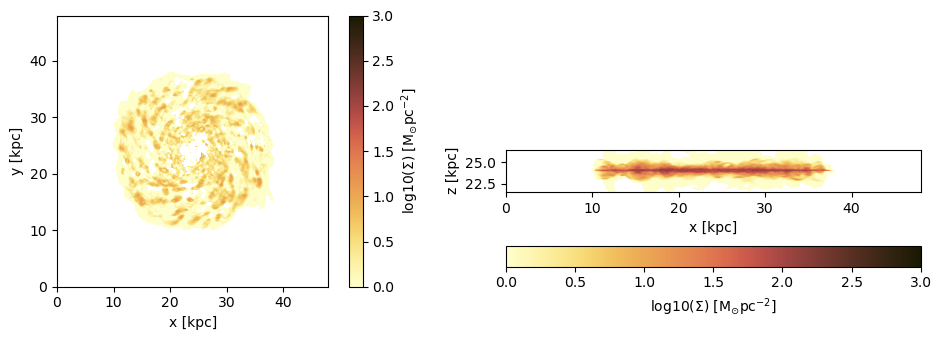

In [119]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);
tight_layout()

## Weighting - Integration
By default, the data is weighted by mass, except for the surface density. Choose different weightings, e.g., volume:


In [129]:
proj_z = projection(gas, :cs, :km_s, weighting=[:volume]);

[Mera]: 2023-04-10T13:31:41.084

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Selected var(s)=(:cs,) 
Weighting      = :volume

Effective resolution: 1024^2
Map size: 1024 x 1024
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


Any quantity that is predefined (see: projection(), getvar()) or is part of the data-table can be selected. Furthermore, a unit can be given, e.g., for volume with cm3:

In [130]:
proj_z = projection(gas, :cs, :km_s, weighting=[:volume, :cm3]);

[Mera]: 2023-04-10T13:34:04.680

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]

Selected var(s)=(:cs,) 
Weighting      = :volume

Effective resolution: 1024^2
Map size: 1024 x 1024
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


This can be useful if you want to make an integrated projection for local emissivities that are given e.g., emissivity/cm3. For such integration, choose the summation mode (examples will be given soon):

In [ ]:
proj_z = projection(gas, :emissivity, weighting=[:volume, :cm3], mode=:sum);